   #### Mawrer Amed Ramirez Martinez ms723737@iteso.mx
   #### Avance de TOG IDI 4

#  Ajuste de Dataset (Preparacion)


In [8]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import os, glob

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
SOURCE_TYPE = "EURUSD_FULL"
FRECUENCIA = "1H"
NUM_FEATURES = 0

In [11]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/dukas/EURUSD/'+FRECUENCIA+'/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))

EURUSD_Candlestick_1_Hour_ASK_31.12.2003-30.05.2020.csv
EURUSD_Candlestick_1_Hour_BID_31.12.2003-30.05.2020.csv


## Read CSV

### Read Ask Dataset

In [12]:
index_ask = 0
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f')
DATASET_ASK = pd.read_csv(filenames[index_ask], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
print(DATASET_ASK)
print(DATASET_ASK.shape)

                  Gmt time     Open     High      Low    Close      Volume
0      2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910   6654.2002
1      2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951    660.6000
2      2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951   2091.0000
3      2004-01-01 03:00:00  1.25950  1.25965  1.25834  1.25869  10003.0996
4      2004-01-01 04:00:00  1.25908  1.25960  1.25843  1.25950   7603.3999
...                    ...      ...      ...      ...      ...         ...
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101

[102514 rows x 6 columns]
(102514, 6)


### Read Bid Dataset

In [13]:
index_bid = 1
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f')
DATASET_BID = pd.read_csv(filenames[index_bid], header=0, parse_dates=['Gmt time'], date_parser=dateparse, 
                          names=['Gmt time','Open_Bid','High_Bid',"Low_Bid","Close_Bid","Volume_Bid"])
print(DATASET_BID)
print(DATASET_BID.shape)

                  Gmt time  Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid
0      2004-01-01 00:00:00   1.25934   1.25948  1.25814    1.25900   7823.1001
1      2004-01-01 01:00:00   1.25942   1.25948  1.25934    1.25941    461.4000
2      2004-01-01 02:00:00   1.25945   1.25948  1.25927    1.25936   1839.8000
3      2004-01-01 03:00:00   1.25934   1.25953  1.25821    1.25854  13349.2998
4      2004-01-01 04:00:00   1.25898   1.25948  1.25829    1.25940   8422.5000
...                    ...       ...       ...      ...        ...         ...
102509 2020-05-29 19:00:00   1.10995   1.11066  1.10859    1.10997  11340.1201
102510 2020-05-29 20:00:00   1.10993   1.11085  1.10979    1.11036   4041.1875
102511 2020-05-31 21:00:00   1.11129   1.11194  1.11123    1.11130    385.2600
102512 2020-05-31 22:00:00   1.11130   1.11144  1.11023    1.11118   4784.7334
102513 2020-05-31 23:00:00   1.11119   1.11195  1.11113    1.11156   4047.4900

[102514 rows x 6 columns]
(102514, 6)


### Merge 2 Datasets ASK + BID

In [14]:
DATASET_FULL = pd.merge(DATASET_ASK,DATASET_BID)
print(DATASET_FULL)

                  Gmt time     Open     High      Low    Close      Volume  \
0      2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910   6654.2002   
1      2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951    660.6000   
2      2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951   2091.0000   
3      2004-01-01 03:00:00  1.25950  1.25965  1.25834  1.25869  10003.0996   
4      2004-01-01 04:00:00  1.25908  1.25960  1.25843  1.25950   7603.3999   
...                    ...      ...      ...      ...      ...         ...   
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid  
0 

### Add Col 'Spread' 

In [15]:
DATASET_FULL['Spread'] = DATASET_FULL['Close'] - DATASET_FULL['Close_Bid']
print(DATASET_FULL['Spread'].describe())
print(DATASET_FULL.head(5))

count    102514.000000
mean          0.000088
std           0.000076
min           0.000000
25%           0.000030
50%           0.000070
75%           0.000100
max           0.002280
Name: Spread, dtype: float64
             Gmt time     Open     High      Low    Close      Volume  \
0 2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910   6654.2002   
1 2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951    660.6000   
2 2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951   2091.0000   
3 2004-01-01 03:00:00  1.25950  1.25965  1.25834  1.25869  10003.0996   
4 2004-01-01 04:00:00  1.25908  1.25960  1.25843  1.25950   7603.3999   

   Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid   Spread  
0   1.25934   1.25948  1.25814    1.25900   7823.1001  0.00010  
1   1.25942   1.25948  1.25934    1.25941    461.4000  0.00010  
2   1.25945   1.25948  1.25927    1.25936   1839.8000  0.00015  
3   1.25934   1.25953  1.25821    1.25854  13349.2998  0.00015  
4   1.25898   1.25948  

### Add Col 'day_name' and 'weekday'

In [16]:
DATASET_FULL['day_name'] = DATASET_FULL['Gmt time'].dt.day_name()
DATASET_FULL['weekday'] = DATASET_FULL['Gmt time'].dt.weekday
print(DATASET_FULL.head(5))

             Gmt time     Open     High      Low    Close      Volume  \
0 2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910   6654.2002   
1 2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951    660.6000   
2 2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951   2091.0000   
3 2004-01-01 03:00:00  1.25950  1.25965  1.25834  1.25869  10003.0996   
4 2004-01-01 04:00:00  1.25908  1.25960  1.25843  1.25950   7603.3999   

   Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid   Spread  day_name  \
0   1.25934   1.25948  1.25814    1.25900   7823.1001  0.00010  Thursday   
1   1.25942   1.25948  1.25934    1.25941    461.4000  0.00010  Thursday   
2   1.25945   1.25948  1.25927    1.25936   1839.8000  0.00015  Thursday   
3   1.25934   1.25953  1.25821    1.25854  13349.2998  0.00015  Thursday   
4   1.25898   1.25948  1.25829    1.25940   8422.5000  0.00010  Thursday   

   weekday  
0        3  
1        3  
2        3  
3        3  
4        3  


### Add Col 'pct_range_Close' 

In [17]:
DATASET_FULL['Pct_Range_Close'] = DATASET_FULL['Close'].pct_change()
DATASET_FULL['Pct_Range_Close'].fillna(0, inplace=True)
print(DATASET_FULL.head())
print(DATASET_FULL.shape)


             Gmt time     Open     High      Low    Close      Volume  \
0 2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910   6654.2002   
1 2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951    660.6000   
2 2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951   2091.0000   
3 2004-01-01 03:00:00  1.25950  1.25965  1.25834  1.25869  10003.0996   
4 2004-01-01 04:00:00  1.25908  1.25960  1.25843  1.25950   7603.3999   

   Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid   Spread  day_name  \
0   1.25934   1.25948  1.25814    1.25900   7823.1001  0.00010  Thursday   
1   1.25942   1.25948  1.25934    1.25941    461.4000  0.00010  Thursday   
2   1.25945   1.25948  1.25927    1.25936   1839.8000  0.00015  Thursday   
3   1.25934   1.25953  1.25821    1.25854  13349.2998  0.00015  Thursday   
4   1.25898   1.25948  1.25829    1.25940   8422.5000  0.00010  Thursday   

   weekday  Pct_Range_Close  
0        3         0.000000  
1        3         0.000326  
2        3    

### Differnce Function

In [18]:
def difference(dataset, interval, col_name):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.DataFrame(diff, columns = [col_name + "_diff"])

### Add Col 'Pct_Range_Close_diff' 

In [19]:
DATASET_FULL['Pct_Range_Close_diff'] = difference(DATASET_FULL['Pct_Range_Close'],1,'Pct_Range_Close').shift(1)
DATASET_FULL['Pct_Range_Close_diff'].fillna(0, inplace=True)
print(DATASET_FULL.head())
print(DATASET_FULL.shape)

             Gmt time     Open     High      Low    Close      Volume  \
0 2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910   6654.2002   
1 2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951    660.6000   
2 2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951   2091.0000   
3 2004-01-01 03:00:00  1.25950  1.25965  1.25834  1.25869  10003.0996   
4 2004-01-01 04:00:00  1.25908  1.25960  1.25843  1.25950   7603.3999   

   Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid   Spread  day_name  \
0   1.25934   1.25948  1.25814    1.25900   7823.1001  0.00010  Thursday   
1   1.25942   1.25948  1.25934    1.25941    461.4000  0.00010  Thursday   
2   1.25945   1.25948  1.25927    1.25936   1839.8000  0.00015  Thursday   
3   1.25934   1.25953  1.25821    1.25854  13349.2998  0.00015  Thursday   
4   1.25898   1.25948  1.25829    1.25940   8422.5000  0.00010  Thursday   

   weekday  Pct_Range_Close  Pct_Range_Close_diff  
0        3         0.000000              0.000000  


### Accumulative Volume


In [20]:
def AQV(df):
    df['AQV'] = df['Volume'].cumsum()
    return df

In [21]:
DATASET_FULL = AQV(DATASET_FULL)
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Spread,day_name,weekday,Pct_Range_Close,Pct_Range_Close_diff,AQV
0,2004-01-01 00:00:00,1.25950,1.25960,1.25826,1.25910,6654.2002,1.25934,1.25948,1.25814,1.25900,7823.1001,0.00010,Thursday,3,0.000000,0.000000,6.654200e+03
1,2004-01-01 01:00:00,1.25958,1.25960,1.25947,1.25951,660.6000,1.25942,1.25948,1.25934,1.25941,461.4000,0.00010,Thursday,3,0.000326,0.000326,7.314800e+03
2,2004-01-01 02:00:00,1.25955,1.25962,1.25944,1.25951,2091.0000,1.25945,1.25948,1.25927,1.25936,1839.8000,0.00015,Thursday,3,0.000000,-0.000326,9.405800e+03
3,2004-01-01 03:00:00,1.25950,1.25965,1.25834,1.25869,10003.0996,1.25934,1.25953,1.25821,1.25854,13349.2998,0.00015,Thursday,3,-0.000651,-0.000651,1.940890e+04
4,2004-01-01 04:00:00,1.25908,1.25960,1.25843,1.25950,7603.3999,1.25898,1.25948,1.25829,1.25940,8422.5000,0.00010,Thursday,3,0.000644,0.001295,2.701230e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102509,2020-05-29 19:00:00,1.10998,1.11070,1.10862,1.10998,12120.8398,1.10995,1.11066,1.10859,1.10997,11340.1201,0.00001,Friday,4,0.000009,-0.000739,2.123164e+09
102510,2020-05-29 20:00:00,1.10997,1.11094,1.10982,1.11071,4646.7427,1.10993,1.11085,1.10979,1.11036,4041.1875,0.00035,Friday,4,0.000658,0.000649,2.123169e+09
102511,2020-05-31 21:00:00,1.11213,1.11217,1.11136,1.11141,417.4906,1.11129,1.11194,1.11123,1.11130,385.2600,0.00011,Sunday,6,0.000630,-0.000027,2.123169e+09
102512,2020-05-31 22:00:00,1.11138,1.11148,1.11028,1.11123,4549.1167,1.11130,1.11144,1.11023,1.11118,4784.7334,0.00005,Sunday,6,-0.000162,-0.000792,2.123174e+09


In [22]:
print(DATASET_FULL['AQV'].describe())
print(DATASET_FULL['AQV'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['AQV'].isnull().sum())

count    1.025140e+05
mean     1.442909e+09
std      5.464361e+08
min      6.654200e+03
25%      1.215958e+09
50%      1.593998e+09
75%      1.807332e+09
max      2.123179e+09
Name: AQV, dtype: float64
0
0


(102514, 17)


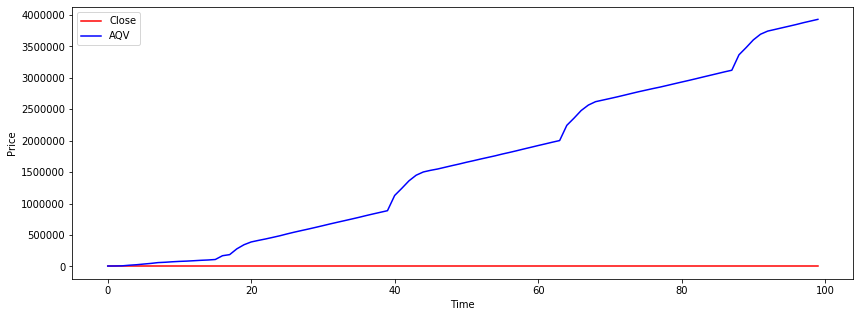

In [23]:
INICIO = 0
FIN = 100
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['AQV'][INICIO:FIN], color = 'blue', label = 'AQV')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

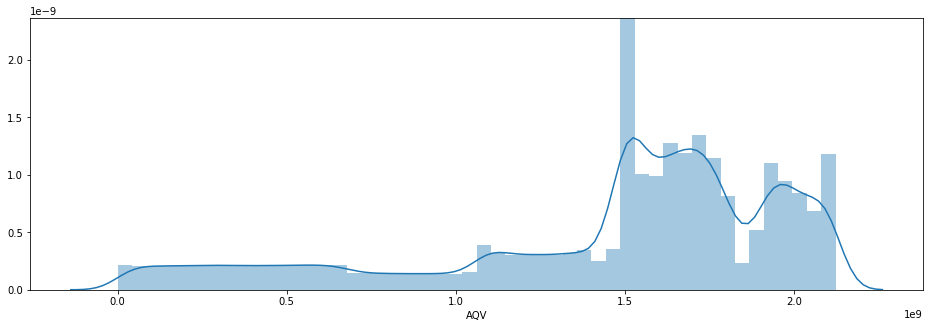

In [24]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['AQV']);

### Accumulative Pct_Range_Close_diff

In [25]:
def AQM_Pct_Range_Close_diff(df):
    df['AQM_Pct_Range_Close_diff'] = df['Pct_Range_Close_diff'].cumsum()
    return df

In [26]:
DATASET_FULL = AQM_Pct_Range_Close_diff(DATASET_FULL)
print(DATASET_FULL.head(3))

             Gmt time     Open     High      Low    Close     Volume  \
0 2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910  6654.2002   
1 2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951   660.6000   
2 2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951  2091.0000   

   Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid   Spread  day_name  \
0   1.25934   1.25948  1.25814    1.25900   7823.1001  0.00010  Thursday   
1   1.25942   1.25948  1.25934    1.25941    461.4000  0.00010  Thursday   
2   1.25945   1.25948  1.25927    1.25936   1839.8000  0.00015  Thursday   

   weekday  Pct_Range_Close  Pct_Range_Close_diff        AQV  \
0        3         0.000000              0.000000  6654.2002   
1        3         0.000326              0.000326  7314.8002   
2        3         0.000000             -0.000326  9405.8002   

   AQM_Pct_Range_Close_diff  
0                  0.000000  
1                  0.000326  
2                  0.000000  


In [27]:
print(DATASET_FULL['AQM_Pct_Range_Close_diff'].describe())
print(DATASET_FULL['AQM_Pct_Range_Close_diff'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['AQM_Pct_Range_Close_diff'].isnull().sum())

count    1.025140e+05
mean    -4.778935e-07
std      1.218502e-03
min     -2.035797e-02
25%     -4.806290e-04
50%      0.000000e+00
75%      4.852857e-04
max      2.303178e-02
Name: AQM_Pct_Range_Close_diff, dtype: float64
0
0


(102514, 18)


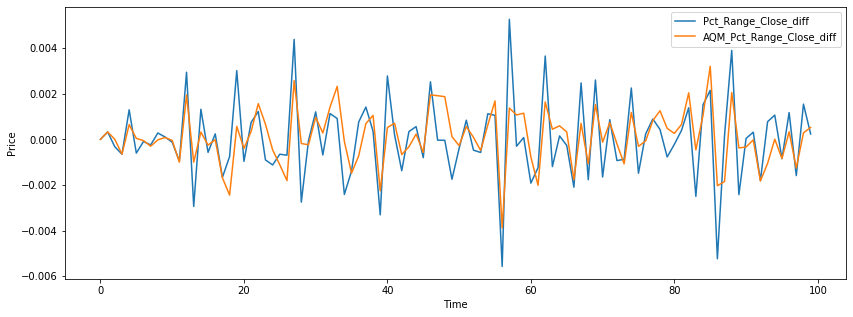

In [28]:
INICIO = 0
FIN = 100
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Pct_Range_Close_diff')
pyplot.plot(DATASET_FULL['Pct_Range_Close_diff'][INICIO:FIN], label = 'Pct_Range_Close_diff')
pyplot.plot(DATASET_FULL['AQM_Pct_Range_Close_diff'][INICIO:FIN], label = 'AQM_Pct_Range_Close_diff')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

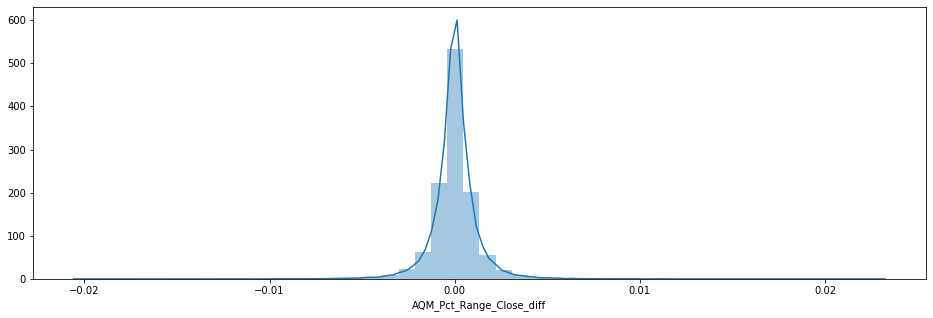

In [29]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['AQM_Pct_Range_Close_diff']);


### Accumulative Pct Change

In [30]:
def AQM_Pct_Range_Close(df):
    df['AQM_Pct_Range_Close'] = df['Pct_Range_Close'].cumsum()
    return df

In [31]:
DATASET_FULL = AQM_Pct_Range_Close(DATASET_FULL)
print(DATASET_FULL.head(3))

             Gmt time     Open     High      Low    Close     Volume  \
0 2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910  6654.2002   
1 2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951   660.6000   
2 2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951  2091.0000   

   Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid   Spread  day_name  \
0   1.25934   1.25948  1.25814    1.25900   7823.1001  0.00010  Thursday   
1   1.25942   1.25948  1.25934    1.25941    461.4000  0.00010  Thursday   
2   1.25945   1.25948  1.25927    1.25936   1839.8000  0.00015  Thursday   

   weekday  Pct_Range_Close  Pct_Range_Close_diff        AQV  \
0        3         0.000000              0.000000  6654.2002   
1        3         0.000326              0.000326  7314.8002   
2        3         0.000000             -0.000326  9405.8002   

   AQM_Pct_Range_Close_diff  AQM_Pct_Range_Close  
0                  0.000000             0.000000  
1                  0.000326             0.00032

In [32]:
print(DATASET_FULL['AQM_Pct_Range_Close'].describe())
print(DATASET_FULL['AQM_Pct_Range_Close'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['AQM_Pct_Range_Close'].isnull().sum())

count    102514.000000
mean          0.041268
std           0.086000
min          -0.127954
25%          -0.036130
50%           0.038528
75%           0.107860
max           0.257421
Name: AQM_Pct_Range_Close, dtype: float64
0
0


(102514, 19)


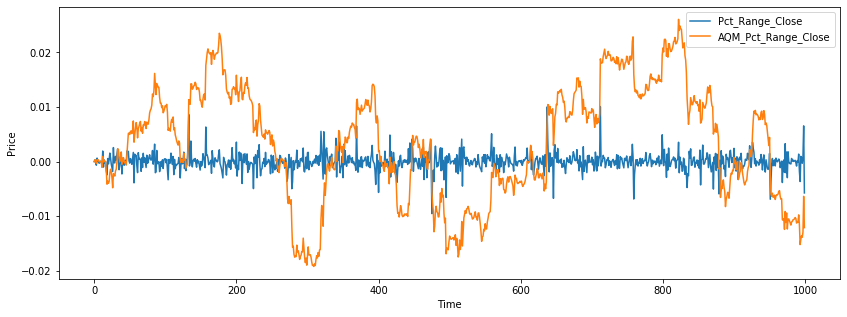

In [33]:
INICIO = 0
FIN = 1000
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Pct_Range_Close_diff')
pyplot.plot(DATASET_FULL['Pct_Range_Close'][INICIO:FIN], label = 'Pct_Range_Close')
pyplot.plot(DATASET_FULL['AQM_Pct_Range_Close'][INICIO:FIN], label = 'AQM_Pct_Range_Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

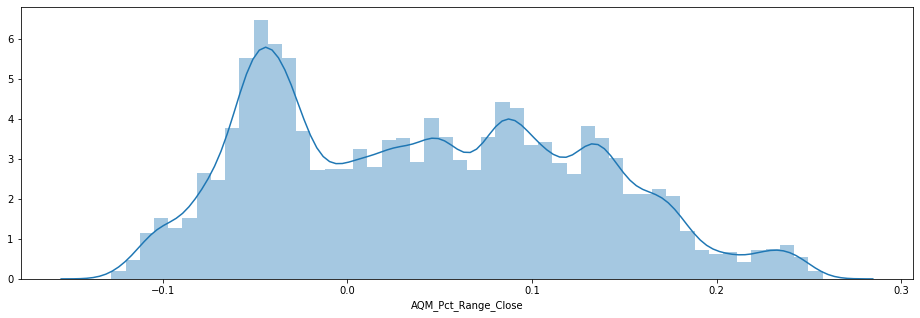

In [34]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['AQM_Pct_Range_Close']);

### Moving Average (MA) Function

In [35]:
#This function add a new column with the MA calculed, with value n
#col_name is the value to be used as base.
def MA(dataset, n, col_name, new_col): 
    MA = pd.Series(dataset[col_name].rolling(n).mean(), name = 'MA_' + col_name +'_'+ str(n)) 
    dataset = dataset.join(MA)  
    return dataset


### Add Col 'MA_Close_5' 

In [36]:
DATASET_FULL = MA(DATASET_FULL,5,'Close','MA_Close_5')
DATASET_FULL['MA_Close_5'].fillna(0, inplace=True)
DATASET_FULL.head(5)

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Spread,day_name,weekday,Pct_Range_Close,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5
0,2004-01-01 00:00:00,1.25950,1.25960,1.25826,1.25910,6654.2002,1.25934,1.25948,1.25814,1.25900,7823.1001,0.00010,Thursday,3,0.000000,0.000000,6654.2002,0.000000,0.000000,0.000000
1,2004-01-01 01:00:00,1.25958,1.25960,1.25947,1.25951,660.6000,1.25942,1.25948,1.25934,1.25941,461.4000,0.00010,Thursday,3,0.000326,0.000326,7314.8002,0.000326,0.000326,0.000000
2,2004-01-01 02:00:00,1.25955,1.25962,1.25944,1.25951,2091.0000,1.25945,1.25948,1.25927,1.25936,1839.8000,0.00015,Thursday,3,0.000000,-0.000326,9405.8002,0.000000,0.000326,0.000000
3,2004-01-01 03:00:00,1.25950,1.25965,1.25834,1.25869,10003.0996,1.25934,1.25953,1.25821,1.25854,13349.2998,0.00015,Thursday,3,-0.000651,-0.000651,19408.8998,-0.000651,-0.000325,0.000000
4,2004-01-01 04:00:00,1.25908,1.25960,1.25843,1.25950,7603.3999,1.25898,1.25948,1.25829,1.25940,8422.5000,0.00010,Thursday,3,0.000644,0.001295,27012.2997,0.000644,0.000318,1.259262


### Add Col 'MA_Close_25' 

In [37]:
DATASET_FULL = MA(DATASET_FULL,25,'Close','MA_Close_25')
DATASET_FULL['MA_Close_25'].fillna(0, inplace=True)
DATASET_FULL[22:27]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Spread,day_name,weekday,Pct_Range_Close,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25
22,2004-01-01 22:00:00,1.25436,1.25650,1.25403,1.25650,22943.5996,1.25420,1.25640,1.25389,1.25640,...,0.00010,Thursday,3,0.001562,0.001219,436971.6990,0.001562,-0.002058,1.254732,0.000000
23,2004-01-01 23:00:00,1.25668,1.25923,1.25582,1.25733,25210.0000,1.25648,1.25905,1.25562,1.25723,...,0.00010,Thursday,3,0.000661,-0.000902,462181.6990,0.000661,-0.001397,1.255418,0.000000
24,2004-01-02 00:00:00,1.25717,1.25936,1.25663,1.25675,25805.3008,1.25701,1.25921,1.25644,1.25659,...,0.00016,Friday,4,-0.000461,-0.001122,487986.9998,-0.000461,-0.001858,1.255846,1.258052
25,2004-01-02 01:00:00,1.25688,1.25698,1.25315,1.25535,29459.3008,1.25678,1.25688,1.25304,1.25525,...,0.00010,Friday,4,-0.001114,-0.000653,517446.3006,-0.001114,-0.002972,1.256094,1.257902
26,2004-01-02 02:00:00,1.25520,1.25558,1.25214,1.25308,27554.9004,1.25500,1.25543,1.25198,1.25292,...,0.00016,Friday,4,-0.001808,-0.000694,545001.2010,-0.001808,-0.004781,1.255802,1.257645


### Add Col 'MA_Close_50' 

In [38]:
DATASET_FULL = MA(DATASET_FULL,50,'Close','MA_Close_50')
DATASET_FULL['MA_Close_50'].fillna(0, inplace=True)
DATASET_FULL[48:52]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,day_name,weekday,Pct_Range_Close,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50
48,2004-01-05 00:00:00,1.26324,1.26687,1.26301,1.26554,26723.5000,1.26308,1.26668,1.26288,1.26538,...,Monday,0,0.001868,-0.000043,1.603687e+06,0.001868,0.005132,1.261370,1.258937,0.000000
49,2004-01-05 01:00:00,1.26549,1.26632,1.26480,1.26569,25525.9004,1.26539,1.26621,1.26460,1.26559,...,Monday,0,0.000119,-0.001750,1.629212e+06,0.000119,0.005251,1.262700,1.259295,1.258673
50,2004-01-05 02:00:00,1.26602,1.26654,1.26418,1.26534,27811.9004,1.26582,1.26644,1.26410,1.26518,...,Monday,0,-0.000277,-0.000395,1.657024e+06,-0.000277,0.004974,1.264104,1.259694,1.258798
51,2004-01-05 03:00:00,1.26522,1.26605,1.26486,1.26605,25342.3008,1.26508,1.26596,1.26469,1.26585,...,Monday,0,0.000561,0.000838,1.682367e+06,0.000561,0.005535,1.265160,1.260213,1.258929


### Add Col 'MA_Close_100' 

In [39]:
DATASET_FULL = MA(DATASET_FULL,100,'Close','MA_Close_100')
DATASET_FULL['MA_Close_100'].fillna(0, inplace=True)
DATASET_FULL[48:52]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,weekday,Pct_Range_Close,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_100
48,2004-01-05 00:00:00,1.26324,1.26687,1.26301,1.26554,26723.5000,1.26308,1.26668,1.26288,1.26538,...,0,0.001868,-0.000043,1.603687e+06,0.001868,0.005132,1.261370,1.258937,0.000000,0.0
49,2004-01-05 01:00:00,1.26549,1.26632,1.26480,1.26569,25525.9004,1.26539,1.26621,1.26460,1.26559,...,0,0.000119,-0.001750,1.629212e+06,0.000119,0.005251,1.262700,1.259295,1.258673,0.0
50,2004-01-05 02:00:00,1.26602,1.26654,1.26418,1.26534,27811.9004,1.26582,1.26644,1.26410,1.26518,...,0,-0.000277,-0.000395,1.657024e+06,-0.000277,0.004974,1.264104,1.259694,1.258798,0.0
51,2004-01-05 03:00:00,1.26522,1.26605,1.26486,1.26605,25342.3008,1.26508,1.26596,1.26469,1.26585,...,0,0.000561,0.000838,1.682367e+06,0.000561,0.005535,1.265160,1.260213,1.258929,0.0


### Add Col 'MA_Close_150' 

In [40]:
DATASET_FULL = MA(DATASET_FULL,150,'Close','MA_Close_150')
DATASET_FULL['MA_Close_150'].fillna(0, inplace=True)
DATASET_FULL[48:52]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Pct_Range_Close,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_100,MA_Close_150
48,2004-01-05 00:00:00,1.26324,1.26687,1.26301,1.26554,26723.5000,1.26308,1.26668,1.26288,1.26538,...,0.001868,-0.000043,1.603687e+06,0.001868,0.005132,1.261370,1.258937,0.000000,0.0,0.0
49,2004-01-05 01:00:00,1.26549,1.26632,1.26480,1.26569,25525.9004,1.26539,1.26621,1.26460,1.26559,...,0.000119,-0.001750,1.629212e+06,0.000119,0.005251,1.262700,1.259295,1.258673,0.0,0.0
50,2004-01-05 02:00:00,1.26602,1.26654,1.26418,1.26534,27811.9004,1.26582,1.26644,1.26410,1.26518,...,-0.000277,-0.000395,1.657024e+06,-0.000277,0.004974,1.264104,1.259694,1.258798,0.0,0.0
51,2004-01-05 03:00:00,1.26522,1.26605,1.26486,1.26605,25342.3008,1.26508,1.26596,1.26469,1.26585,...,0.000561,0.000838,1.682367e+06,0.000561,0.005535,1.265160,1.260213,1.258929,0.0,0.0


### Add Col 'MA_Close_175' 

In [41]:
DATASET_FULL = MA(DATASET_FULL,175,'Close','MA_Close_175')
DATASET_FULL['MA_Close_175'].fillna(0, inplace=True)
DATASET_FULL[48:52]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_100,MA_Close_150,MA_Close_175
48,2004-01-05 00:00:00,1.26324,1.26687,1.26301,1.26554,26723.5000,1.26308,1.26668,1.26288,1.26538,...,-0.000043,1.603687e+06,0.001868,0.005132,1.261370,1.258937,0.000000,0.0,0.0,0.0
49,2004-01-05 01:00:00,1.26549,1.26632,1.26480,1.26569,25525.9004,1.26539,1.26621,1.26460,1.26559,...,-0.001750,1.629212e+06,0.000119,0.005251,1.262700,1.259295,1.258673,0.0,0.0,0.0
50,2004-01-05 02:00:00,1.26602,1.26654,1.26418,1.26534,27811.9004,1.26582,1.26644,1.26410,1.26518,...,-0.000395,1.657024e+06,-0.000277,0.004974,1.264104,1.259694,1.258798,0.0,0.0,0.0
51,2004-01-05 03:00:00,1.26522,1.26605,1.26486,1.26605,25342.3008,1.26508,1.26596,1.26469,1.26585,...,0.000838,1.682367e+06,0.000561,0.005535,1.265160,1.260213,1.258929,0.0,0.0,0.0


### Add Col 'MA_Close_200' 

In [42]:
DATASET_FULL = MA(DATASET_FULL,200,'Close','MA_Close_200')
DATASET_FULL['MA_Close_200'].fillna(0, inplace=True)
DATASET_FULL[198:202]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_100,MA_Close_150,MA_Close_175,MA_Close_200
198,2004-01-13 06:00:00,1.27563,1.27654,1.27549,1.27586,25126.5000,1.27548,1.27644,1.27539,1.27570,...,8.462994e+06,0.000094,0.013418,1.275840,1.278913,1.279621,1.273798,1.272448,1.270518,0.000000
199,2004-01-13 07:00:00,1.27584,1.27666,1.27351,1.27436,25980.0000,1.27580,1.27649,1.27341,1.27426,...,8.488974e+06,-0.001176,0.012243,1.275586,1.278516,1.279646,1.273828,1.272506,1.270619,1.269048
200,2004-01-13 08:00:00,1.27435,1.27891,1.27331,1.27891,24881.5996,1.27419,1.27884,1.27318,1.27871,...,8.513855e+06,0.003570,0.015813,1.276222,1.278232,1.279762,1.273897,1.272596,1.270753,1.269147
201,2004-01-13 09:00:00,1.27890,1.27957,1.27550,1.27552,24909.9004,1.27880,1.27947,1.27536,1.27538,...,8.538765e+06,-0.002651,0.013162,1.276078,1.277701,1.279831,1.273935,1.272660,1.270881,1.269227


### Save CSV File 'DF_EURUSD_ASK_1H_PROC.csv'

In [43]:
#Get the Final number of Features
NUM_FEATURES = str(DATASET_FULL.shape[1])
filename = SOURCE_TYPE + '_' + FRECUENCIA + '_' + NUM_FEATURES + 'F.csv'
print(filename)

EURUSD_FULL_1H_26F.csv


In [44]:
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados/' + filename)
DATASET_FULL.to_csv(filename_path, header=True, index=False)

In [45]:
filename_path

'/Users/marami3/Documents/ITESO/IDI4/forex_prediction/Jupyter Notebooks/IDI4/dataset_regression/../../../Datasets/Junio2020/procesados/EURUSD_FULL_1H_26F.csv'